<a href="https://colab.research.google.com/github/ChetanThosar/Kaggle-Projects/blob/main/Kaggle_Assessment_Challenge_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [230]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
#to ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [231]:
train_data=pd.read_csv("train.csv",index_col=0)

In [232]:
train_data.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850
5,Acura,Integra LS,2003,124756,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Beige,At least 1 accident or damage reported,Yes,4995
6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,Yes,26500
7,GMC,Acadia SLT-1,2019,51300,Gasoline,193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,Yes,25500
8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,Yes,13999


In [233]:
train_data.shape

(54273, 12)

In [234]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54273 entries, 0 to 54272
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         54273 non-null  object
 1   model         54273 non-null  object
 2   model_year    54273 non-null  int64 
 3   milage        54273 non-null  int64 
 4   fuel_type     54273 non-null  object
 5   engine        54273 non-null  object
 6   transmission  54273 non-null  object
 7   ext_col       54273 non-null  object
 8   int_col       54273 non-null  object
 9   accident      54273 non-null  object
 10  clean_title   54273 non-null  object
 11  price         54273 non-null  int64 
dtypes: int64(3), object(9)
memory usage: 5.4+ MB


model_year, milage and price column are for integer data type and all the other columns are of object type

In [235]:
train_data.describe()

,model_year,milage,price
count,54273.000000,54273.000000,5.427300e+04
mean,2015.091979,72746.175667,3.921844e+04
std,5.588909,50469.490448,7.282634e+04
min,1974.000000,100.000000,2.000000e+03
25%,2012.000000,32268.000000,1.550000e+04
50%,2016.000000,66107.000000,2.800000e+04
75%,2019.000000,102000.000000,4.500000e+04
max,2024.000000,405000.000000,2.954083e+06


In [236]:
#Checking unique values in each column
train_data.nunique()

brand             53
model           1827
model_year        34
milage          3212
fuel_type          7
engine          1061
transmission      46
ext_col          260
int_col          124
accident           2
clean_title        1
price           1481
dtype: int64

In [237]:
#Missing value calculation
train_data.isnull().sum()

brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

No null values in the dataset

In [238]:
train_data.duplicated().sum()

0

No duplicate values


In [239]:
train_data.drop(columns=['clean_title'], inplace=True)

<Axes: xlabel='fuel_type'>

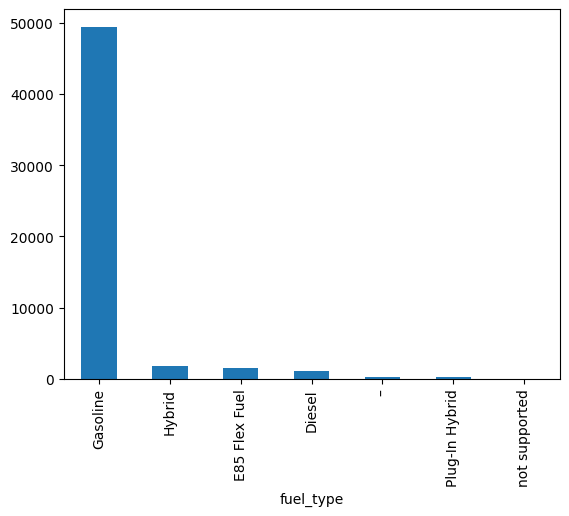

In [240]:
train_data['fuel_type'].value_counts().plot(kind='bar')

Most of the cars use Gasoline as fuel

<Axes: xlabel='accident'>

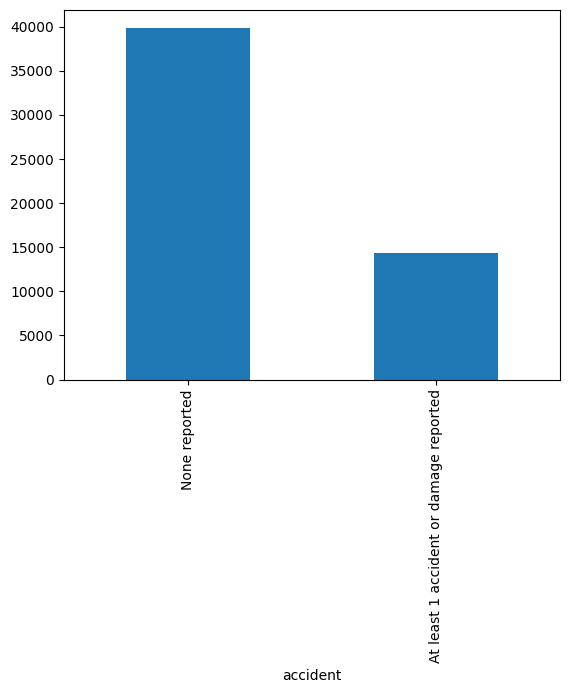

In [241]:
train_data['accident'].value_counts().plot(kind='bar')

Most of the cars have no reported accidents associated with them

In [ ]:
import datetime

current_year = datetime.date.today().year

train_data['car_age'] = current_year - train_data['model_year']


In [242]:
train_data.head(10)

,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,price
id,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,11000
1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,8250
2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,15000
3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,63500
4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,7850
5,Acura,Integra LS,2003,124756,Gasoline,140.0HP 1.8L 4 Cylinder Engine Gasoline Fuel,5-Speed M/T,Red,Beige,At least 1 accident or damage reported,4995
6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,333.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,7-Speed A/T,Gray,Black,None reported,26500
7,GMC,Acadia SLT-1,2019,51300,Gasoline,193.0HP 2.5L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Black,At least 1 accident or damage reported,25500
8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,200.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Silver,Black,None reported,13999


In [243]:
train_data['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
–                   294
Plug-In Hybrid      182
not supported         4
Name: count, dtype: int64

In [244]:
train_data['fuel_type'].replace('–', 'not supported', inplace = True)

In [245]:
train_data['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [246]:
train_data['fuel_type'].value_counts()

fuel_type
Gasoline          49439
Hybrid             1766
E85 Flex Fuel      1479
Diesel             1109
Electric            298
Plug-In Hybrid      182
Name: count, dtype: int64

In [247]:
train_data['accident'].value_counts()

accident
None reported                             39896
At least 1 accident or damage reported    14377
Name: count, dtype: int64

In [248]:
train_data['accident']=train_data['accident'].apply(lambda x:0 if 'None' in str(x) else 1)

In [250]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
train_data[['Horsepower', 'Engine_Displacement']] = train_data['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [251]:
train_data['Horsepower'].dtype

dtype('O')

In [252]:
train_data['Horsepower']=pd.to_numeric(train_data['Horsepower'],errors='coerce')

In [253]:
train_data['Horsepower'].isnull().sum()

4057

In [254]:
train_data['Engine_Displacement'].dtype

dtype('O')

In [255]:
train_data['Engine_Displacement'] = train_data['Engine_Displacement'].str.replace('L', '')
train_data['Engine_Displacement']=pd.to_numeric(train_data['Engine_Displacement'],errors='coerce')

In [256]:
train_data['Engine_Displacement'].isnull().sum()

606

In [257]:
#Imputing null values in Horse Power and Engine Displacement

train_data['Horsepower'].fillna(train_data['Horsepower'].mean(), inplace = True)
train_data['Horsepower'].isnull().sum()

train_data['Engine_Displacement'].fillna(train_data['Engine_Displacement'].mean(), inplace = True)
train_data['Engine_Displacement'].isnull().sum()

0

In [258]:
train_data=train_data.drop(columns=['engine'],axis=1)

In [ ]:
train_data.drop(columns=['model_year'],inplace=True)

In [259]:
train_data.shape

(54273, 12)

In [260]:
train_data.head(10)

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,Horsepower,Engine_Displacement
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,10-Speed A/T,Blue,Gray,0,11000,375.0,3.5
1,BMW,335 i,2007,80000,Gasoline,6-Speed M/T,Black,Black,0,8250,300.0,3.0
2,Jaguar,XF Luxury,2009,91491,Gasoline,6-Speed A/T,Purple,Beige,0,15000,300.0,4.2
3,BMW,X7 xDrive40i,2022,2437,Hybrid,Transmission w/Dual Shift Mode,Gray,Brown,0,63500,335.0,3.0
4,Pontiac,Firebird Base,2001,111000,Gasoline,A/T,White,Black,0,7850,200.0,3.8
5,Acura,Integra LS,2003,124756,Gasoline,5-Speed M/T,Red,Beige,1,4995,140.0,1.8
6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,7-Speed A/T,Gray,Black,0,26500,333.0,3.0
7,GMC,Acadia SLT-1,2019,51300,Gasoline,6-Speed A/T,White,Black,1,25500,193.0,2.5
8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,7-Speed A/T,Silver,Black,0,13999,200.0,2.0


In [261]:
train_data['transmission']=train_data['transmission'].str.contains('A/T|Automatic',case=False).astype(str)

<Axes: xlabel='transmission', ylabel='count'>

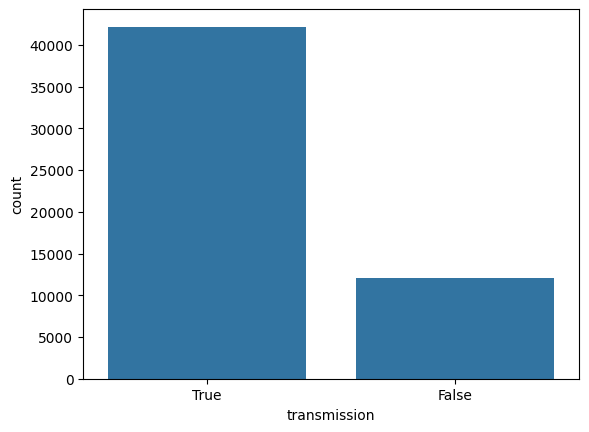

In [262]:
sns.countplot(x=train_data['transmission'])

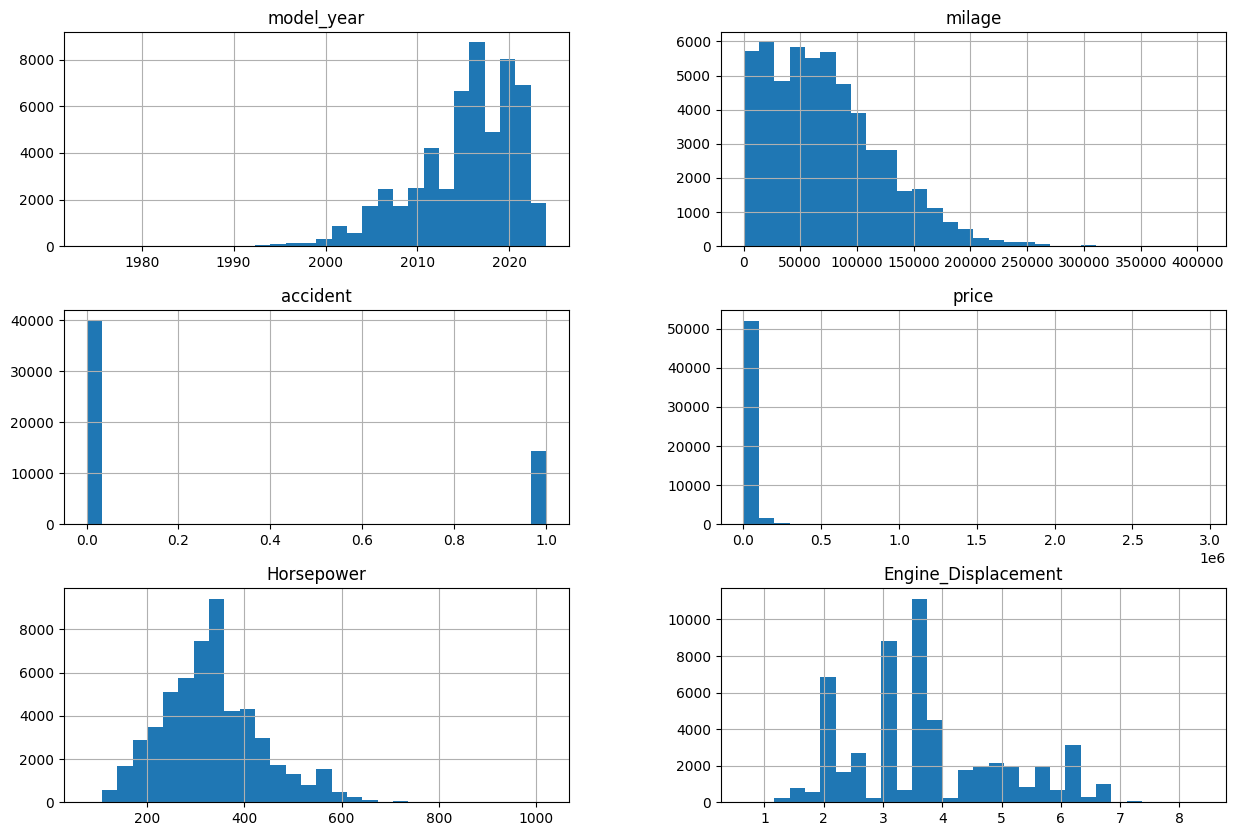

In [263]:
train_data.hist(figsize=(15,10),bins=30)
plt.show()

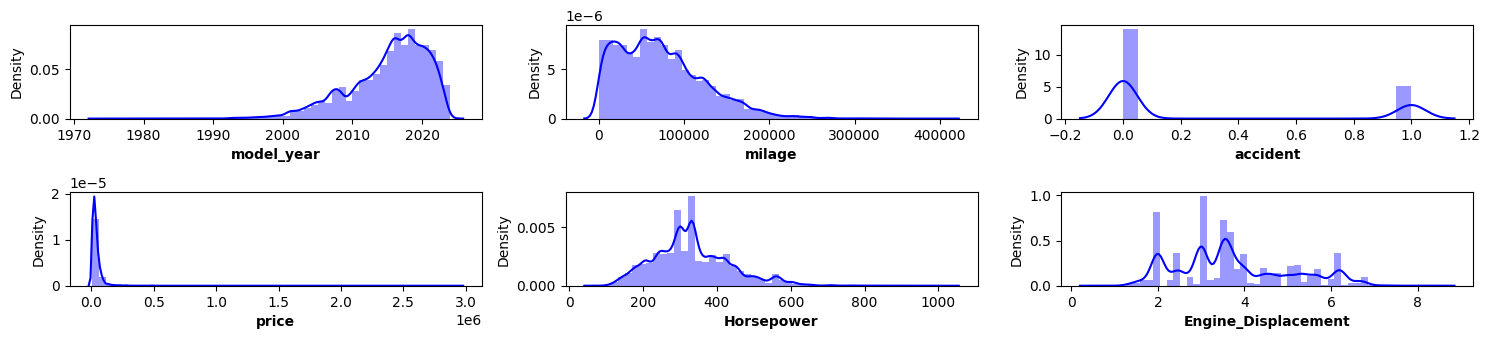

In [264]:
numeric_features = [feature for feature in train_data.columns if train_data[feature].dtype != 'O']

plt.figure(figsize=(15, 100))
for i, col in enumerate(numeric_features):
    plt.subplot(60, 3, i+1)
    sns.distplot(x=train_data[col], color='blue')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

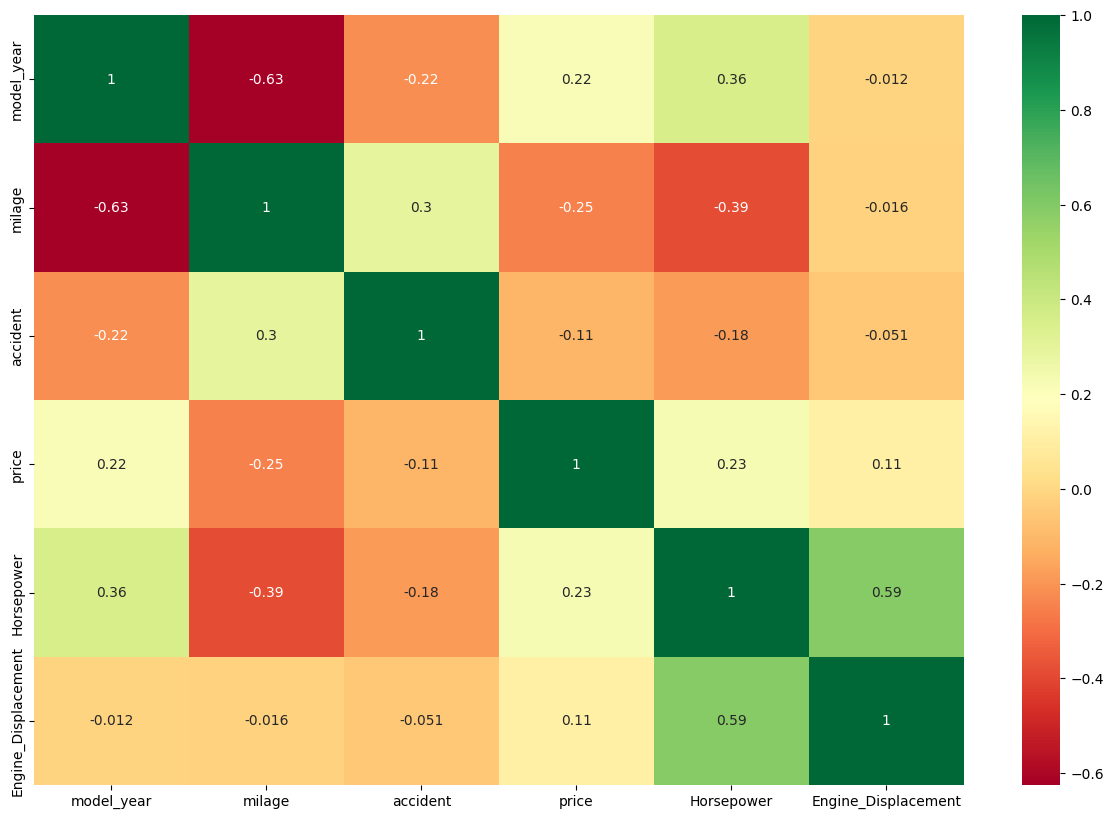

In [265]:
#heatmap of numeric_features


plt.figure(figsize=(15, 10))
sns.heatmap(train_data[numeric_features].corr(), annot=True, cmap="RdYlGn")
plt.show()


Milage and Price columns look skewed. Apply log transformation on these columns

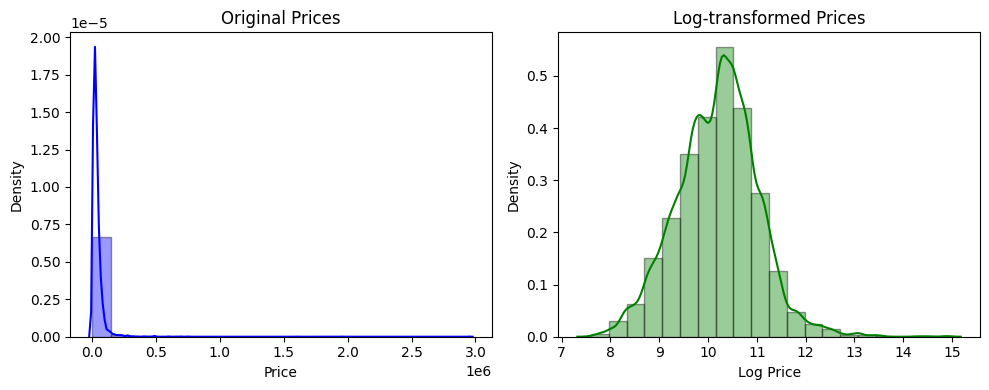

In [266]:
## Plotting data distribution for Price
original_prices = train_data['price']

def handle_zero_prices(price):
    if price == 0:
        return 1
    else:
        return price

train_data['price'] = train_data['price'].apply(handle_zero_prices)

# Log-transformed 'price' column
train_data['log_price'] = np.log(train_data['price'])  # add 1 to handle zero values
log_transformed_prices = train_data['log_price']

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Plotting original prices
sns.distplot(original_prices, bins=20, hist=True, kde=True, color='blue',
             hist_kws={'edgecolor':'black'}, ax=axes[0])
axes[0].set_title('Original Prices')
axes[0].set_xlabel('Price')
axes[0].set_ylabel('Density')

# Plotting log-transformed prices
sns.distplot(log_transformed_prices, bins=20, hist=True, kde=True, color='green',
             hist_kws={'edgecolor':'black'}, ax=axes[1])
axes[1].set_title('Log-transformed Prices')
axes[1].set_xlabel('Log Price')
axes[1].set_ylabel('Density')


plt.tight_layout()
plt.show();

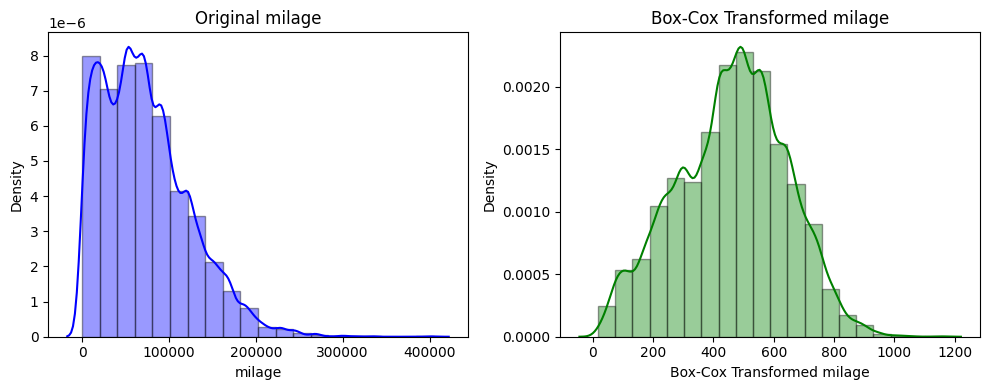

In [267]:
## Applying Boxcox on milage
from scipy.stats import boxcox

original_mileage = train_data['milage']

# Apply Box-Cox transformation
transformed_mileage, lambda_value = boxcox(train_data['milage'] + 1)  # Adding 1 to handle zero and negative values

# Convert transformed array back to DataFrame series
train_data['milage_boxcox'] = transformed_mileage

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))


sns.distplot(original_mileage, bins=20, hist=True, kde=True, color='blue',
             hist_kws={'edgecolor':'black'}, ax=axes[0])
axes[0].set_title('Original milage')
axes[0].set_xlabel('milage')
axes[0].set_ylabel('Density')


sns.distplot(transformed_mileage, bins=20, hist=True, kde=True, color='green',
             hist_kws={'edgecolor':'black'}, ax=axes[1])
axes[1].set_title('Box-Cox Transformed milage')
axes[1].set_xlabel('Box-Cox Transformed milage')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

In [268]:
train_data.head(10)

,brand,model,model_year,milage,fuel_type,transmission,ext_col,int_col,accident,price,Horsepower,Engine_Displacement,log_price,milage_boxcox
id,,,,,,,,,,,,,,
0,Ford,F-150 Lariat,2018,74349,Gasoline,True,Blue,Gray,0,11000,375.0,3.5,9.305651,502.528551
1,BMW,335 i,2007,80000,Gasoline,False,Black,Black,0,8250,300.0,3.0,9.017968,521.028341
2,Jaguar,XF Luxury,2009,91491,Gasoline,True,Purple,Beige,0,15000,300.0,4.2,9.615805,556.699700
3,BMW,X7 xDrive40i,2022,2437,Hybrid,False,Gray,Brown,0,63500,335.0,3.0,11.058795,92.009772
4,Pontiac,Firebird Base,2001,111000,Gasoline,True,White,Black,0,7850,200.0,3.8,8.968269,612.389129
5,Acura,Integra LS,2003,124756,Gasoline,False,Red,Beige,1,4995,140.0,1.8,8.516193,648.706613
6,Audi,S5 3.0T Prestige,2014,107380,Gasoline,True,Gray,Black,0,26500,333.0,3.0,10.184900,602.456507
7,GMC,Acadia SLT-1,2019,51300,Gasoline,True,White,Black,1,25500,193.0,2.5,10.146434,418.401077
8,Audi,A3 2.0T Tech Premium,2016,87842,Gasoline,True,Silver,Black,0,13999,200.0,2.0,9.546741,545.632554


In [269]:
train_data.columns

Index(['brand', 'model', 'model_year', 'milage', 'fuel_type', 'transmission',
       'ext_col', 'int_col', 'accident', 'price', 'Horsepower',
       'Engine_Displacement', 'log_price', 'milage_boxcox'],
      dtype='object')

In [270]:
train_data.drop(columns=['price','milage'],inplace=True)

<Axes: xlabel='car_age', ylabel='Density'>

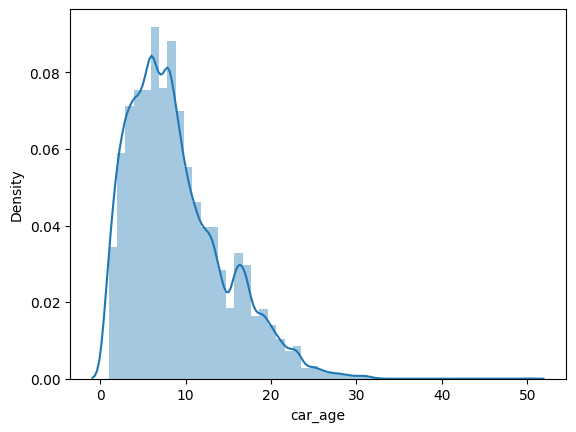

In [ ]:
sns.distplot(train_data['car_age'])

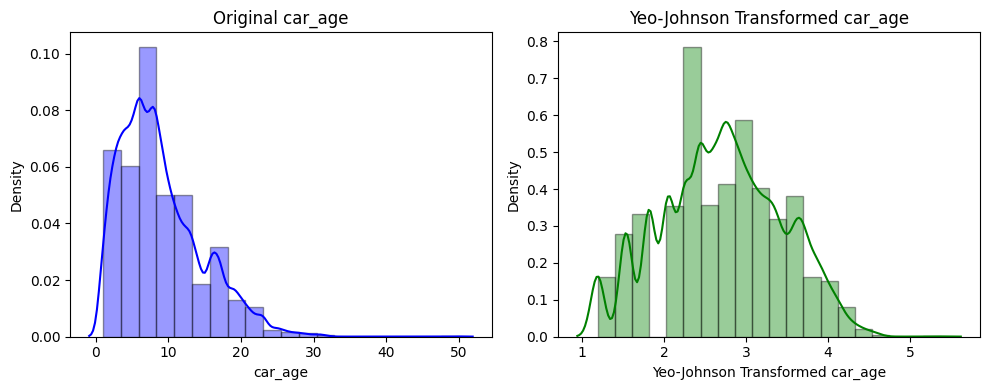

In [ ]:
# prompt: yeo johnson transformation

import matplotlib.pyplot as plt
from scipy.stats import yeojohnson

# Apply Yeo-Johnson transformation to 'car_age'
train_data['car_age_yeojohnson'], lambda_value = yeojohnson(train_data['car_age'] + 1)

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Original 'car_age' distribution
sns.distplot(train_data['car_age'], bins=20, hist=True, kde=True, color='blue',
             hist_kws={'edgecolor':'black'}, ax=axes[0])
axes[0].set_title('Original car_age')
axes[0].set_xlabel('car_age')
axes[0].set_ylabel('Density')

# Yeo-Johnson transformed 'car_age' distribution
sns.distplot(train_data['car_age_yeojohnson'], bins=20, hist=True, kde=True, color='green',
             hist_kws={'edgecolor':'black'}, ax=axes[1])
axes[1].set_title('Yeo-Johnson Transformed car_age')
axes[1].set_xlabel('Yeo-Johnson Transformed car_age')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


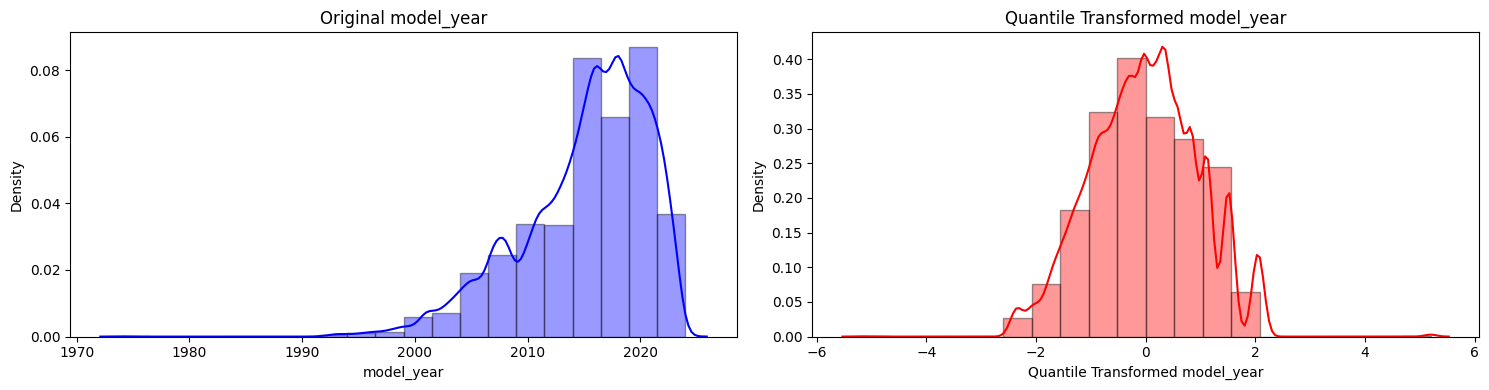

In [274]:
# prompt: quantile transformation

import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer

# Create a QuantileTransformer object
quantile_transformer = QuantileTransformer(n_quantiles=100, random_state=0, output_distribution='normal')

# Apply quantile transformation to 'Model year'
train_data['model_year_quantile'] = quantile_transformer.fit_transform(train_data['model_year'].values.reshape(-1, 1))

# Create figure and axes
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

# Original 'car_age' distribution
sns.distplot(train_data['model_year'], bins=20, hist=True, kde=True, color='blue',
             hist_kws={'edgecolor':'black'}, ax=axes[0])
axes[0].set_title('Original model_year')
axes[0].set_xlabel('model_year')
axes[0].set_ylabel('Density')


# Quantile transformed 'car_age' distribution
sns.distplot(train_data['model_year_quantile'], bins=20, hist=True, kde=True, color='red',
             hist_kws={'edgecolor':'black'}, ax=axes[1])
axes[1].set_title('Quantile Transformed model_year')
axes[1].set_xlabel('Quantile Transformed model_year')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()


In [ ]:
train_data['old_car_age']=train_data['car_age']
train_data.drop(columns=['car_age'],inplace=True)

In [275]:
train_data.drop(columns=['model_year'],inplace=True)

In [276]:
train_data.rename(columns={
    'log_price': 'price',
    'milage_boxcox': 'mileage',
    'model_year_quantile': 'model_year'
}, inplace=True)



In [277]:

train_data.head(5)

,brand,model,fuel_type,transmission,ext_col,int_col,accident,Horsepower,Engine_Displacement,price,mileage,model_year
id,,,,,,,,,,,,
0,Ford,F-150 Lariat,Gasoline,True,Blue,Gray,0,375.0,3.5,9.305651,502.528551,0.362241
1,BMW,335 i,Gasoline,False,Black,Black,0,300.0,3.0,9.017968,521.028341,-1.275817
2,Jaguar,XF Luxury,Gasoline,True,Purple,Beige,0,300.0,4.2,9.615805,556.699700,-1.008673
3,BMW,X7 xDrive40i,Hybrid,False,Gray,Brown,0,335.0,3.0,11.058795,92.009772,1.508944
4,Pontiac,Firebird Base,Gasoline,True,White,Black,0,200.0,3.8,8.968269,612.389129,-2.049594


In [292]:
final_df = train_data.copy(deep=True)

In [293]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor

In [294]:
final_df.drop(columns=["ext_col","int_col"],inplace=True)

In [295]:
X = final_df.drop('price', axis=1)

y = final_df['price']

In [175]:
final_df.drop(columns=['old_car_age'],inplace=True)

In [296]:
numerical_features = X.select_dtypes(exclude="object").columns

numerical_features

Index(['accident', 'Horsepower', 'Engine_Displacement', 'mileage',
       'model_year'],
      dtype='object')

In [297]:
final_df[numerical_features].head()

,accident,Horsepower,Engine_Displacement,mileage,model_year
id,,,,,
0,0,375.0,3.5,502.528551,0.362241
1,0,300.0,3.0,521.028341,-1.275817
2,0,300.0,4.2,556.699700,-1.008673
3,0,335.0,3.0,92.009772,1.508944
4,0,200.0,3.8,612.389129,-2.049594


In [298]:
categorical_features = X.select_dtypes(include="object").columns

categorical_features

Index(['brand', 'model', 'fuel_type', 'transmission'], dtype='object')

In [299]:
final_df[categorical_features].head()



,brand,model,fuel_type,transmission
id,,,,
0,Ford,F-150 Lariat,Gasoline,True
1,BMW,335 i,Gasoline,False
2,Jaguar,XF Luxury,Gasoline,True
3,BMW,X7 xDrive40i,Hybrid,False
4,Pontiac,Firebird Base,Gasoline,True


In [300]:
## Define the pipeline

num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", RobustScaler())
    ]
)

cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("ordinalencoder", OrdinalEncoder()),
    ]
)

In [301]:
transformer = ColumnTransformer(transformers=[
   ("OrdinalEncoder", OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features),
    ("RobustScaler", RobustScaler(), numerical_features)
], remainder="passthrough")

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [303]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

In [304]:
from xgboost import XGBRegressor
from sklearn.model_selection import learning_curve

def plot_learning_curve(model):
    train_sizes,train_scores,test_scores=learning_curve(
        X=X_train,
        y=y_train,
        estimator=model,
        train_sizes=np.linspace(0.1,1,10),
        cv=3,
        scoring='neg_root_mean_squared_error',
        verbose=1
    )

    train_scores_mean=np.mean(train_scores,axis=1)
    train_scores_std=np.std(train_scores,axis=1)
    test_scores_mean=np.mean(test_scores,axis=1)
    test_scores_std=np.std(test_scores,axis=1)

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training Accuracy', color='blue')
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color='blue')
    plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy', color='red')
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color='red')
    plt.xlabel('Training Set Size')
    plt.ylabel('MAE')
    plt.title('Learning Curve for XGBoost Classifier')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()

[learning_curve] Training set sizes: [ 2894  5789  8683 11578 14472 17367 20261 23156 26050 28945]


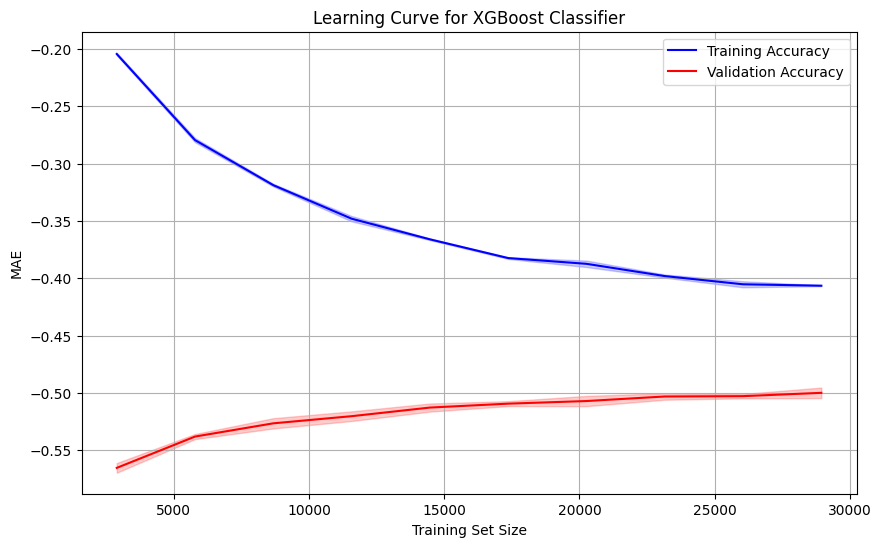

In [305]:
plot_learning_curve(XGBRegressor())

In [306]:
from sklearn.model_selection import GridSearchCV

param_grid={'n_estimators':[100,500,1000,2000],
            'max_depth':[3,5,8,10],
            'learning_rate':[0.2,0.25,0.3,0.35]}


grid_search_cv=GridSearchCV(estimator=XGBRegressor(),
                         param_grid=param_grid,
                         scoring='neg_root_mean_squared_error',
                         cv=3,
                         verbose=10)

grid_search_cv.fit(X_train,y_train)

best_model=grid_search_cv.best_estimator_
print(grid_search_cv.best_estimator_)
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV 1/3; 1/64] START learning_rate=0.2, max_depth=3, n_estimators=100...........
[CV 1/3; 1/64] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=-0.500 total time=   0.2s
[CV 2/3; 1/64] START learning_rate=0.2, max_depth=3, n_estimators=100...........
[CV 2/3; 1/64] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=-0.493 total time=   0.2s
[CV 3/3; 1/64] START learning_rate=0.2, max_depth=3, n_estimators=100...........
[CV 3/3; 1/64] END learning_rate=0.2, max_depth=3, n_estimators=100;, score=-0.493 total time=   0.2s
[CV 1/3; 2/64] START learning_rate=0.2, max_depth=3, n_estimators=500...........
[CV 1/3; 2/64] END learning_rate=0.2, max_depth=3, n_estimators=500;, score=-0.498 total time=   2.1s
[CV 2/3; 2/64] START learning_rate=0.2, max_depth=3, n_estimators=500...........
[CV 2/3; 2/64] END learning_rate=0.2, max_depth=3, n_estimators=500;, score=-0.493 total time=   3.0s
[CV 3/3; 2/64] START le

In [307]:
train_prediction=best_model.predict(X_train)
test_prediction=best_model.predict(X_test)

In [308]:
from sklearn import metrics
from sklearn.metrics import mean_absolute_error

r2_train=metrics.r2_score(train_prediction,y_train)
r2_test=metrics.r2_score(test_prediction,y_test)
mae_train=metrics.mean_absolute_error(train_prediction,y_train)
mae_test=metrics.mean_absolute_error(test_prediction,y_test)
rmse_train=metrics.mean_squared_error(train_prediction,y_train,squared=False)
rmse_test=metrics.mean_squared_error(test_prediction,y_test,squared=False)
train_scores={'R2_train':r2_train,'MAE_train':mae_train,'RMSE_train':rmse_train}
test_scores={'R2_test':r2_test,'MAE_test':mae_test,'RMSE_test':rmse_test}
print(train_scores)
print(test_scores)

{'R2_train': 0.5344412232698856, 'MAE_train': 0.3186676242792158, 'RMSE_train': 0.45935108850910006}
{'R2_test': 0.48705853743255867, 'MAE_test': 0.33162066639945287, 'RMSE_test': 0.47932948609542175}


In [309]:
def Training(model, X_train, X_test, y_train, y_test):
    model = model()
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    error = mean_absolute_error(y_test, predictions)
    return error

In [310]:
from sklearn.linear_model import HuberRegressor, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [311]:

rf_error = Training(RandomForestRegressor, X_train, X_test, y_train, y_test)

hb_error = Training(HuberRegressor, X_train, X_test, y_train, y_test)

lr_error = Training(LinearRegression, X_train, X_test, y_train, y_test)

dt_error = Training(DecisionTreeRegressor, X_train, X_test, y_train, y_test)

ab_error = Training(AdaBoostRegressor, X_train, X_test, y_train, y_test)

gb_error = Training(GradientBoostingRegressor, X_train, X_test, y_train, y_test)

xgb_error = Training(XGBRegressor, X_train, X_test, y_train, y_test)

In [312]:
Errors = {'RandomForestRegressor': rf_error,
          'HuberRegressor': hb_error,
          'LinearRegressor': lr_error,
          'DecisionTreeRegressor': dt_error,
          'AdaBoostRegressor': ab_error,
          'GradientBoostingRegressor': gb_error,
         'XGBoostRegressor': xgb_error}

In [313]:
names = list(Errors.keys())
values = list(Errors.values())

<BarContainer object of 7 artists>

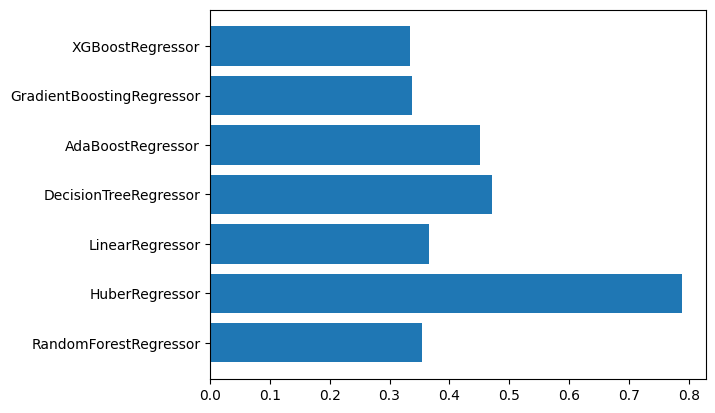

In [314]:
plt.barh(range(len(Errors)), values, tick_label=names)

In [315]:
Accuracy = pd.DataFrame(list(Errors.items()), columns = ['Model_Name' ,'Mean_Error'])

In [316]:
Accuracy.sort_values(by = 'Mean_Error')

,Model_Name,Mean_Error
6,XGBoostRegressor,0.334614
5,GradientBoostingRegressor,0.337658
0,RandomForestRegressor,0.353666
2,LinearRegressor,0.365877
4,AdaBoostRegressor,0.451576
3,DecisionTreeRegressor,0.470470
1,HuberRegressor,0.789367


In [317]:
test_data=pd.read_csv("test.csv")

In [200]:
test_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [201]:
test_data['car_age'] = current_year - test_data['model_year']


In [318]:
test_data['fuel_type'].replace('–', 'not supported', inplace = True)

In [319]:
test_data['fuel_type'].replace('not supported', 'Electric', inplace = True)

In [320]:
test_data['accident']=test_data['accident'].apply(lambda x:0 if 'None' in str(x) else 1)

In [321]:
import re
# Define a function to extract engine attributes
def extract_engine_attributes(engine_str):
    horsepower = re.search(r'(\d+\.\d+)HP|\d+\.\d+', engine_str)
    displacement = re.search(r'(\d+\.\d+L|\d+\.\d+ Liter)', engine_str)
    return horsepower.group(1) if horsepower else '',\
           displacement.group(1) if displacement else ''

# Apply the function to create new columns
test_data[['Horsepower', 'Engine_Displacement']] = test_data['engine'].apply(extract_engine_attributes).apply(pd.Series)

In [206]:
test_data['Horsepower'].dtype

dtype('O')

In [322]:
test_data['Horsepower']=pd.to_numeric(test_data['Horsepower'],errors='coerce')

In [208]:
test_data['Engine_Displacement'].dtype

dtype('O')

In [323]:
test_data['Engine_Displacement'] = test_data['Engine_Displacement'].str.replace('L', '')
test_data['Engine_Displacement']=pd.to_numeric(test_data['Engine_Displacement'],errors='coerce')

In [324]:
test_data['transmission']=test_data['transmission'].str.contains('A/T|Automatic',case=False).astype(str)

In [325]:
test_data.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,Horsepower,Engine_Displacement
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,True,White,Beige,0,Yes,302.0,3.5
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,True,Silver,Black,0,Yes,275.0,3.5
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,True,Blue,White,0,Yes,241.0,2.0
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,False,White,White,1,Yes,518.0,5.0
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,True,White,Black,1,Yes,335.0,3.0


In [326]:
#replace milage column name
test_data.rename(columns={'milage':'mileage'},inplace=True)

In [327]:
X1_test = transformer.transform(test_data)

In [328]:
final_prediction=best_model.predict(X1_test)

In [329]:
output = pd.DataFrame({'id': test_data.id, 'price': final_prediction})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
